In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings
import pydub
warnings.filterwarnings('ignore')

# Задание 1. Жёсткие фильтры

In [96]:
a = 5
t1, t2 = -1, 10

In [97]:
def g(t):
    return np.piecewise(t, [(t1 <= t) & (t <= t2)], [a])

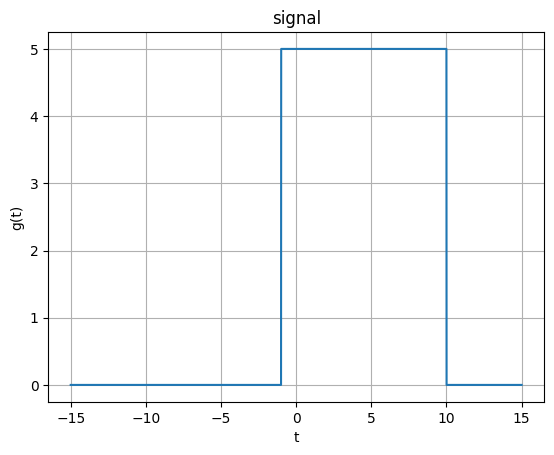

In [98]:
T = 30
dt = 0.01
t = np.linspace(-T / 2, T / 2, int(T / dt))
plt.title('signal')
plt.plot(t, g(t))
plt.xlabel('t')
plt.ylabel('g(t)')
plt.grid(True)

In [99]:
def u(t, b, c, d):
    return g(t) + b * (np.random.rand(len(t)) - 0.5) + c * np.sin(d * t)

## Убираем высокие частоты

In [36]:
c, d = 0, 0

In [37]:
T = 30
dt = 0.01
t = np.linspace(-T / 2, T / 2, int(T / dt))
V = 1 / dt
dv = 1 / T
freq = np.linspace(-V / 2, V / 2, int(V / dv))


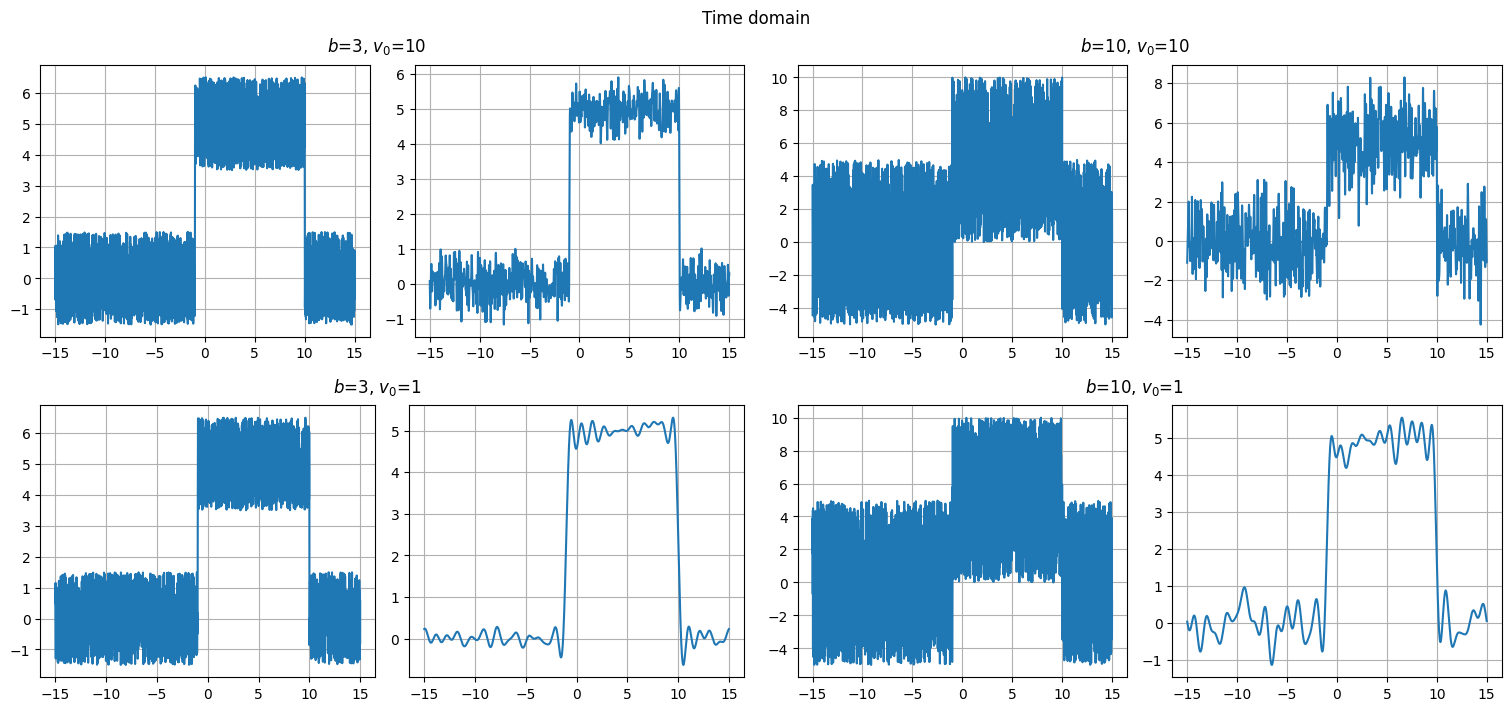

In [43]:
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)
plt.suptitle('Time domain')

B = [3, 10, 3, 10]
V0 = [10, 10, 1, 1]
for outerind, subfig in enumerate(subfigs.flat):
    b = B[outerind]
    v0 = V0[outerind]
    subfig.suptitle(f'$b$={b}, $v_0$={v0}')
    axs = subfig.subplots(1, 2)
    u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, c, d)))
    u_hat_filtered = u_hat.copy()
    for i, v in enumerate(freq):
        if np.abs(v) > v0:
            u_hat_filtered[i] = 0
    u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))
    plt.sca(axs[0])
    plt.plot(t, u(t, b, c, d))
    plt.grid(True)
    plt.sca(axs[1])
    plt.plot(t, u_filtered)
    plt.grid(True)

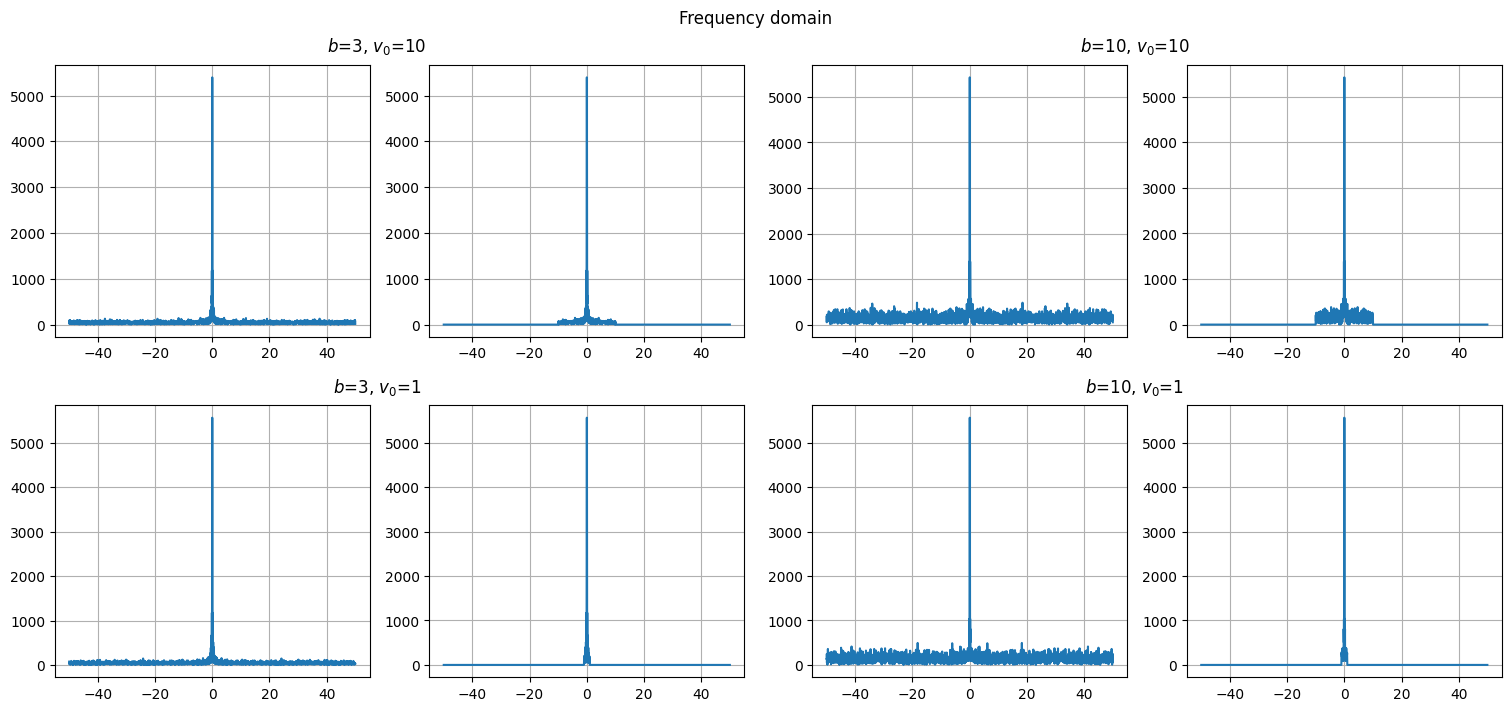

In [42]:
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)
plt.suptitle('Frequency domain')

B = [3, 10, 3, 10]
V0 = [10, 10, 1, 1]
for outerind, subfig in enumerate(subfigs.flat):
    b = B[outerind]
    v0 = V0[outerind]
    subfig.suptitle(f'$b$={b}, $v_0$={v0}')
    axs = subfig.subplots(1, 2)
    u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, c, d)))
    u_hat_filtered = u_hat.copy()
    for i, v in enumerate(freq):
        if np.abs(v) > v0:
            u_hat_filtered[i] = 0
    plt.sca(axs[0])
    plt.plot(freq, np.abs(u_hat))
    plt.grid(True)
    plt.sca(axs[1])
    plt.plot(freq, np.abs(u_hat_filtered))
    plt.grid(True)

## Убираем специфические частоты

In [185]:
T = 30
dt = 0.01
t = np.linspace(-T / 2, T / 2, int(T / dt))
V = 1 / dt
dv = 1 / T
u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, c, d)))
freq = np.linspace(-V / 2, V / 2, int(V / dv))

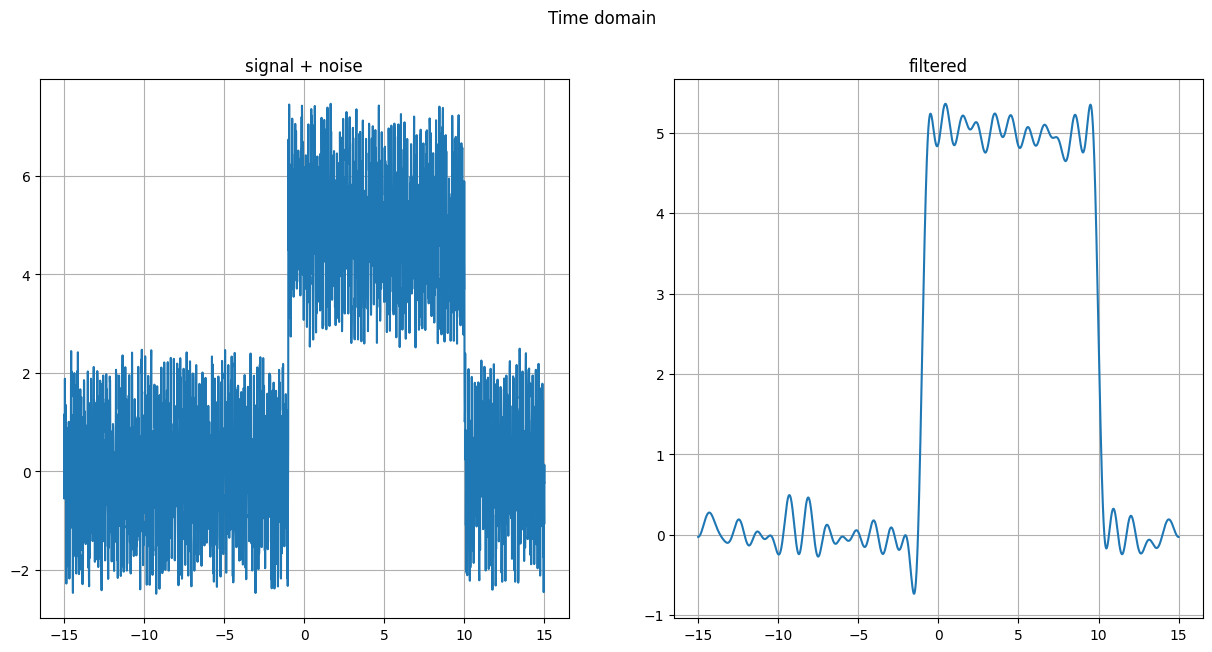

In [186]:
b, c, d = 3, 1, 2 * np.pi * 5

v0 = 5

u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, c, d)))
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if v0 - 1 <= np.abs(v) <= v0 + 1 or np.abs(v) >= 6 or 1 < np.abs(v) < 4:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.suptitle('Time domain')
plt.sca(axs[0])
plt.title('signal + noise')
plt.plot(t, u(t, b, c, d))
plt.grid(True)
plt.sca(axs[1])
plt.title('filtered')
plt.plot(t, u_filtered)
plt.grid(True)

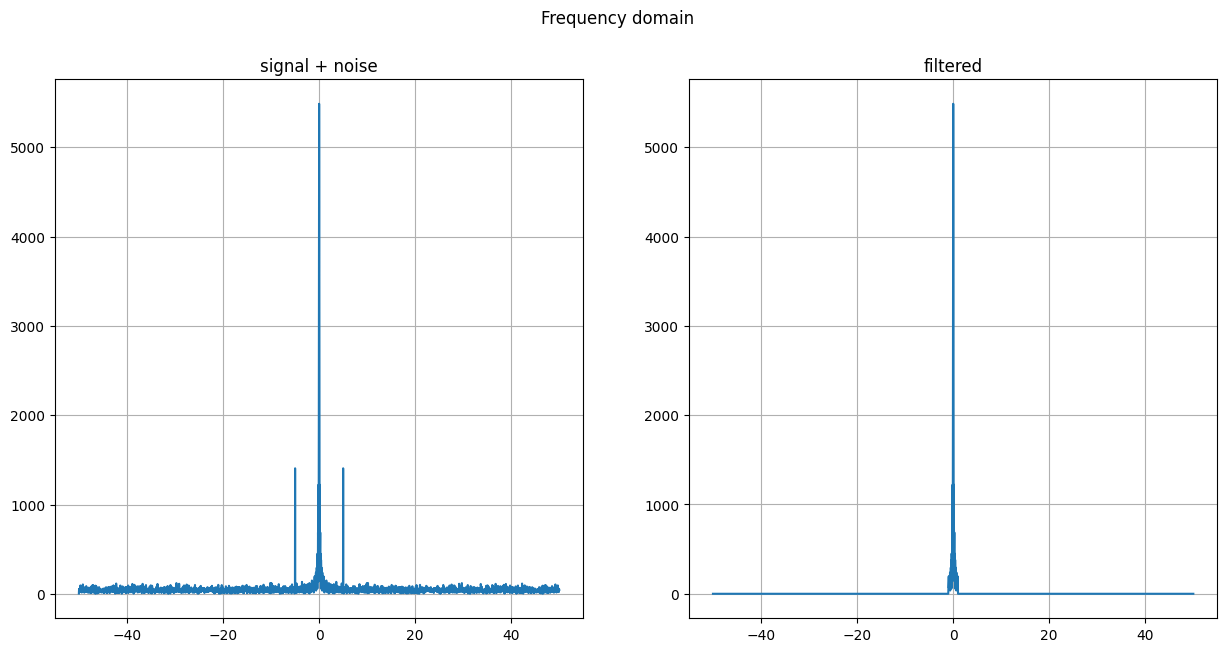

In [187]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.suptitle('Frequency domain')
plt.sca(axs[0])
plt.title('signal + noise')
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.title('filtered')
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

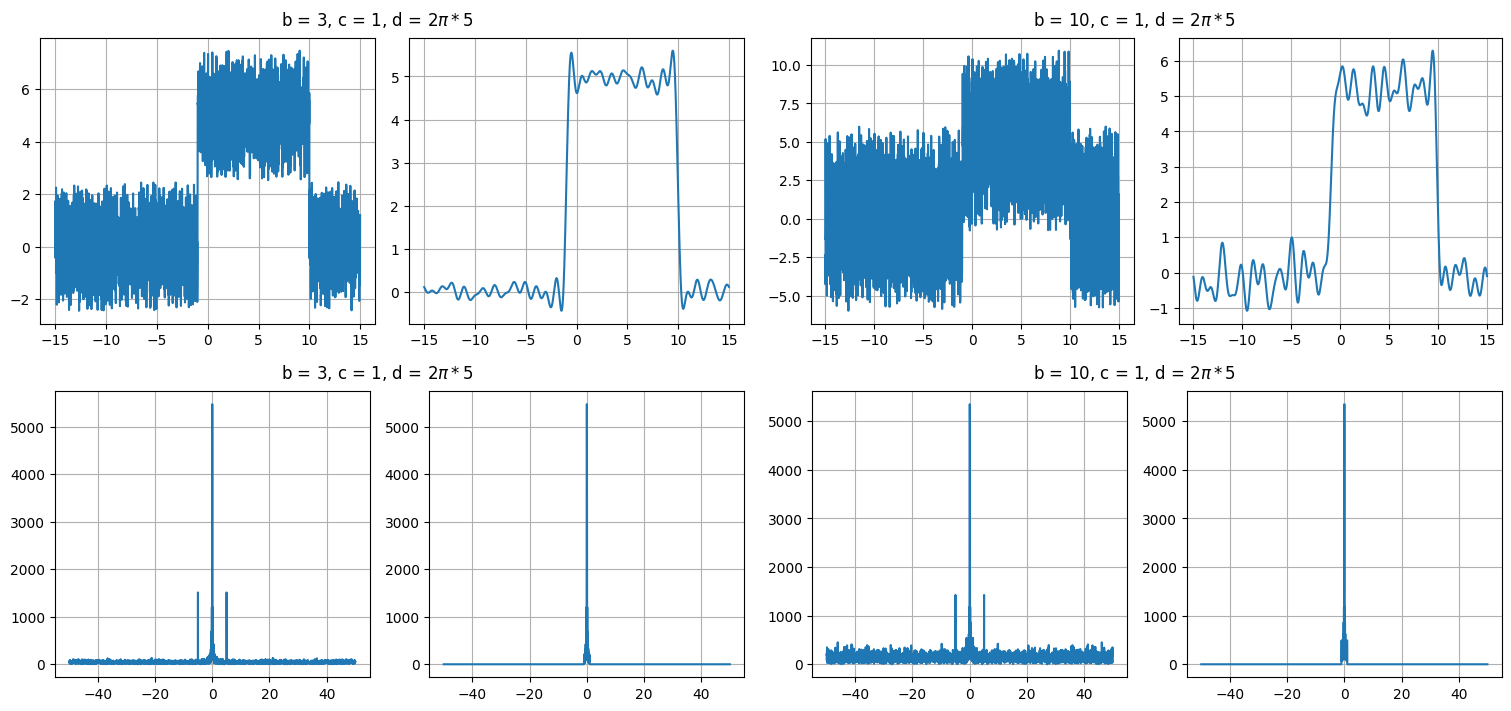

In [192]:
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)

B = [3, 10]
c, d = 1, 2 * np.pi * 5
v0 = 5

axs = subfigs.flat[0].subplots(1, 2)
subfigs.flat[0].suptitle('b = 3, c = 1, d = $2\pi * 5$')

u_hat = sp.fft.fftshift(sp.fft.fft(u(t, B[0], c, d)))
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if v0 - 1 <= np.abs(v) <= v0 + 1 or np.abs(v) >= 6 or 1 < np.abs(v) <= 4:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

plt.sca(axs[0])
plt.plot(t, u(t, B[0], c, d))
plt.grid(True)
plt.sca(axs[1])
plt.plot(t, u_filtered)
plt.grid(True)

axs = subfigs.flat[2].subplots(1, 2)
subfigs.flat[2].suptitle('b = 3, c = 1, d = $2\pi * 5$')

plt.sca(axs[0])
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

axs = subfigs.flat[1].subplots(1, 2)
subfigs.flat[1].suptitle('b = 10, c = 1, d = $2\pi * 5$')

u_hat = sp.fft.fftshift(sp.fft.fft(u(t, B[1], c, d)))
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if v0 - 1 <= np.abs(v) <= v0 + 1 or np.abs(v) >= 6 or 1 < np.abs(v) <= 4:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

plt.sca(axs[0])
plt.plot(t, u(t, B[1], c, d))
plt.grid(True)
plt.sca(axs[1])
plt.plot(t, u_filtered)
plt.grid(True)

axs = subfigs.flat[3].subplots(1, 2)
subfigs.flat[3].suptitle('b = 10, c = 1, d = $2\pi * 5$')

plt.sca(axs[0])
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

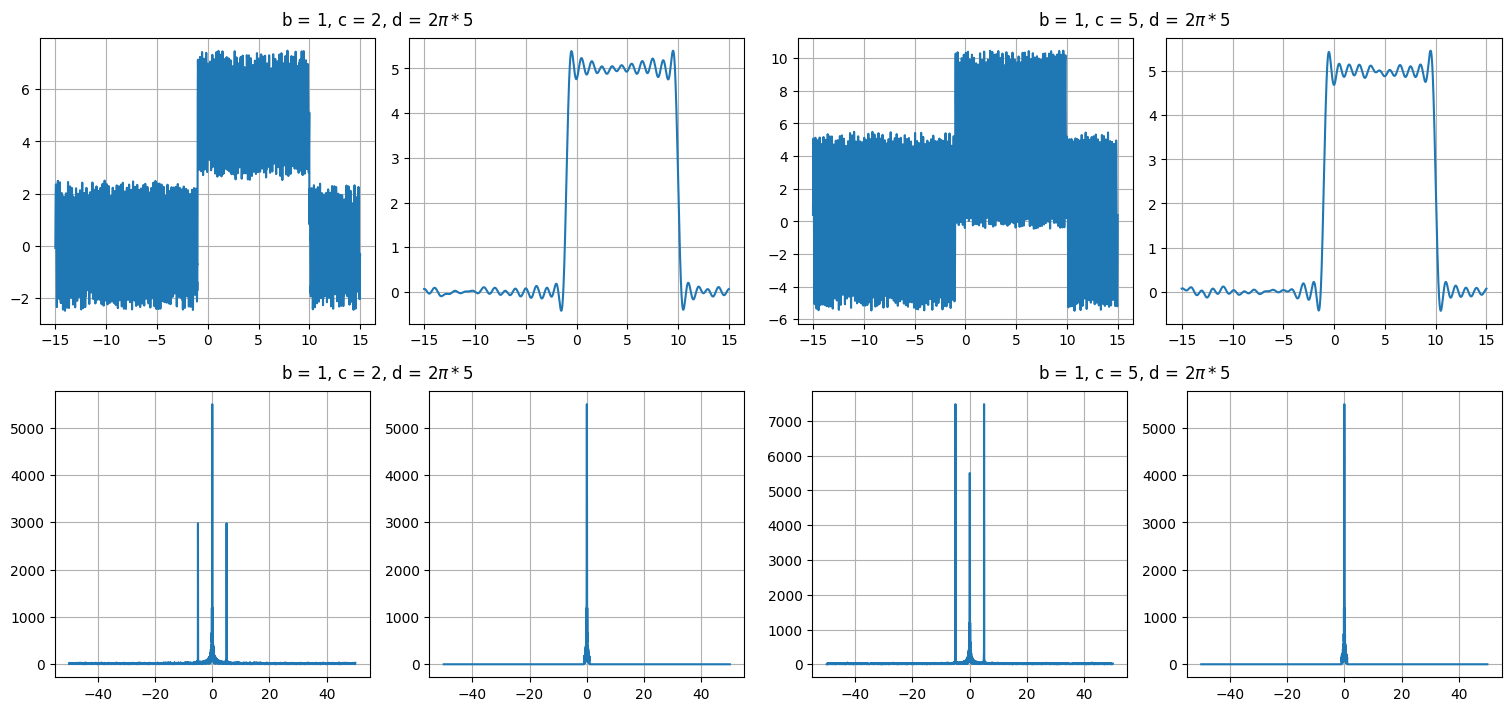

In [193]:
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)

C = [2, 5]
b, d = 1, 2 * np.pi * 5
v0 = 5

axs = subfigs.flat[0].subplots(1, 2)
subfigs.flat[0].suptitle('b = 1, c = 2, d = $2\pi * 5$')

u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, C[0], d)))
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if v0 - 1 <= np.abs(v) <= v0 + 1 or np.abs(v) >= 6 or 1 < np.abs(v) <= 4:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

plt.sca(axs[0])
plt.plot(t, u(t, b, C[0], d))
plt.grid(True)
plt.sca(axs[1])
plt.plot(t, u_filtered)
plt.grid(True)

axs = subfigs.flat[2].subplots(1, 2)
subfigs.flat[2].suptitle('b = 1, c = 2, d = $2\pi * 5$')

plt.sca(axs[0])
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

axs = subfigs.flat[1].subplots(1, 2)
subfigs.flat[1].suptitle('b = 1, c = 5, d = $2\pi * 5$')

u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, C[1], d)))
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if v0 - 1 <= np.abs(v) <= v0 + 1 or np.abs(v) >= 6 or 1 < np.abs(v) <= 4:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

plt.sca(axs[0])
plt.plot(t, u(t, b, C[1], d))
plt.grid(True)
plt.sca(axs[1])
plt.plot(t, u_filtered)
plt.grid(True)

axs = subfigs.flat[3].subplots(1, 2)
subfigs.flat[3].suptitle('b = 1, c = 5, d = $2\pi * 5$')

plt.sca(axs[0])
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

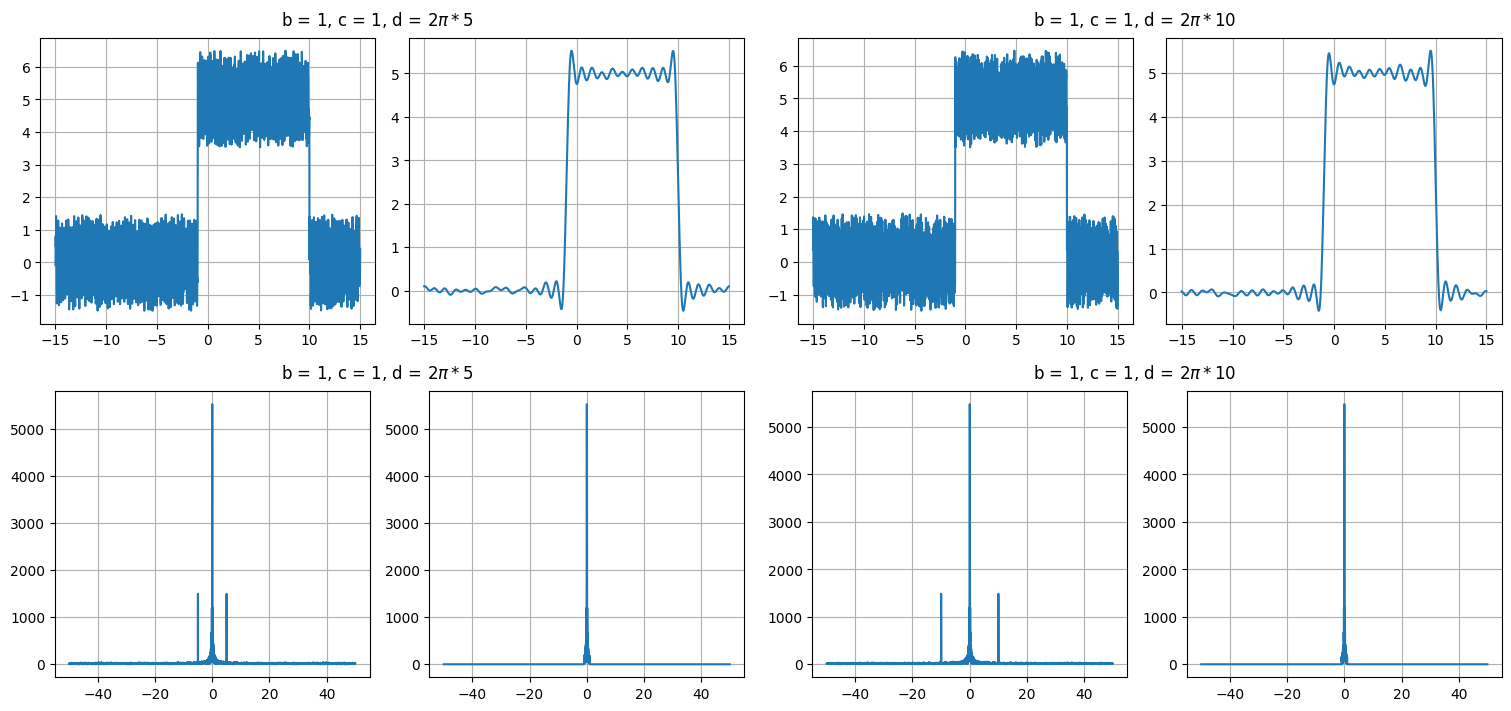

In [197]:
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)

D = [5, 10]
b, c = 1, 1
V0 = [5, 10]

axs = subfigs.flat[0].subplots(1, 2)
subfigs.flat[0].suptitle('b = 1, c = 1, d = $2\pi * 5$')

u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, c, D[0] * 2 * np.pi)))
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if V0[0] - 1 <= np.abs(v) <= V0[0] + 1 or np.abs(v) >= 6 or 1 < np.abs(v) <= 4:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

plt.sca(axs[0])
plt.plot(t, u(t, b, c, D[0] * 2 * np.pi))
plt.grid(True)
plt.sca(axs[1])
plt.plot(t, u_filtered)
plt.grid(True)

axs = subfigs.flat[2].subplots(1, 2)
subfigs.flat[2].suptitle('b = 1, c = 1, d = $2\pi * 5$')

plt.sca(axs[0])
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

axs = subfigs.flat[1].subplots(1, 2)
subfigs.flat[1].suptitle('b = 1, c = 1, d = $2\pi * 10$')

u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, c, D[1] * 2 * np.pi)))
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if V0[1] - 1 <= np.abs(v) <= V0[1] + 1 or np.abs(v) >= 6 or 1 < np.abs(v) <= 6:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

plt.sca(axs[0])
plt.plot(t, u(t, b, c, D[1] * 2 * np.pi))
plt.grid(True)
plt.sca(axs[1])
plt.plot(t, u_filtered)
plt.grid(True)

axs = subfigs.flat[3].subplots(1, 2)
subfigs.flat[3].suptitle('b = 1, c = 1, d = $2\pi * 10$')

plt.sca(axs[0])
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

In [172]:
b, c, d = 0, 1, 2 * np.pi * 4
v0 = 4
u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, c, d)))
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if v0 - 1 <= np.abs(v) <= v0 + 1:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

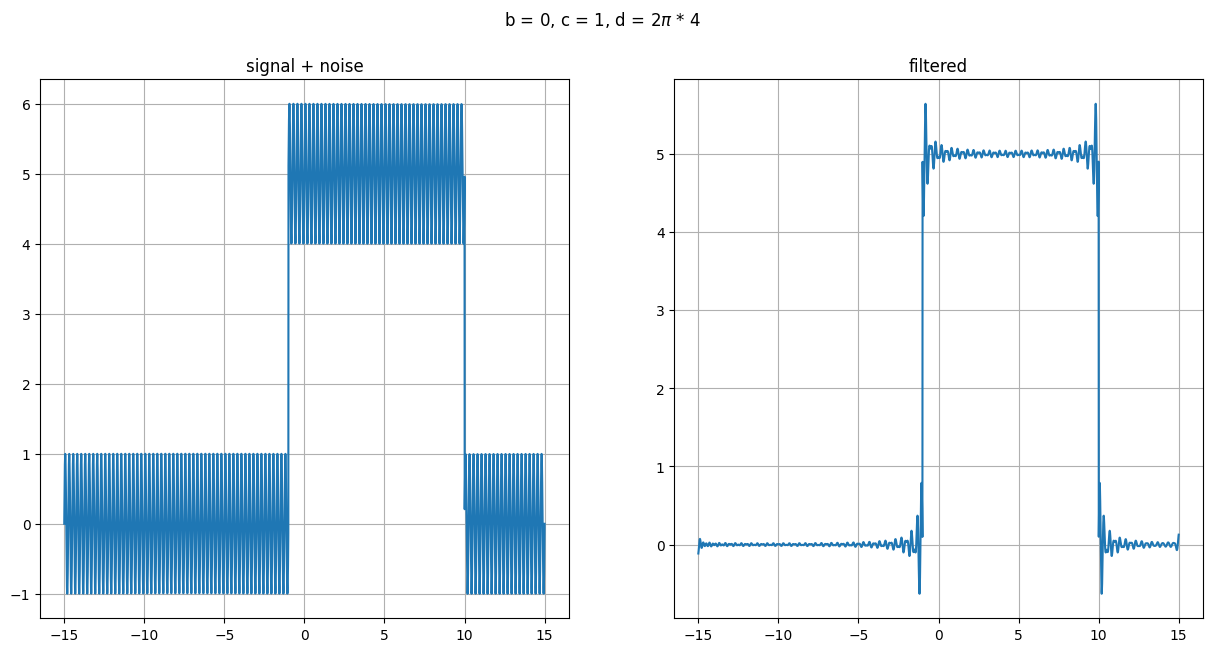

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.suptitle('b = 0, c = 1, d = $2\pi$ * 4')
plt.sca(axs[0])
plt.title('signal + noise')
plt.plot(t, u(t, b, c, d))
plt.grid(True)
plt.sca(axs[1])
plt.title('filtered')
plt.plot(t, u_filtered)
plt.grid(True)

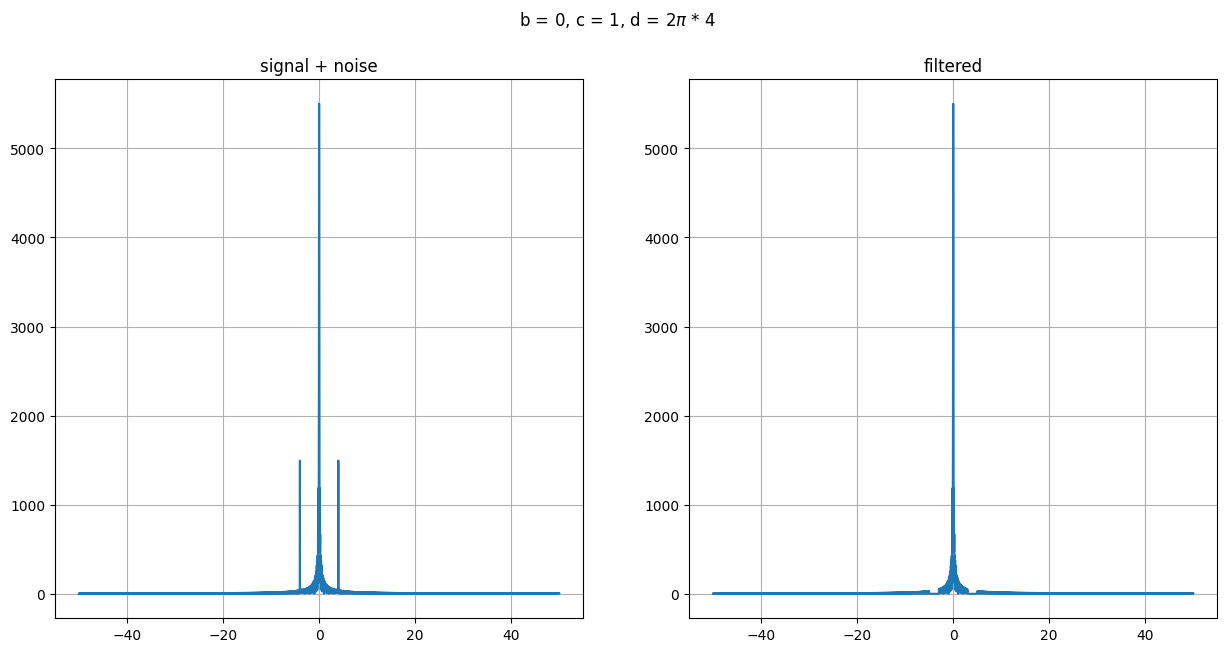

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.suptitle('b = 0, c = 1, d = $2\pi$ * 4')
plt.sca(axs[0])
plt.title('signal + noise')
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.title('filtered')
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

## Убираем низкие частоты?

In [47]:
b, c, d = 1, 1, 1

In [48]:
T = 30
dt = 0.01
t = np.linspace(-T / 2, T / 2, int(T / dt))
V = 1 / dt
dv = 1 / T
u_hat = sp.fft.fftshift(sp.fft.fft(u(t, b, c, d)))
freq = np.linspace(-V / 2, V / 2, int(V / dv))

In [49]:
delta = 3
u_hat_filtered = u_hat.copy()
for i, v in enumerate(freq):
    if np.abs(v) <= delta:
        u_hat_filtered[i] = 0
u_filtered = sp.fft.ifft(sp.fft.ifftshift(u_hat_filtered))

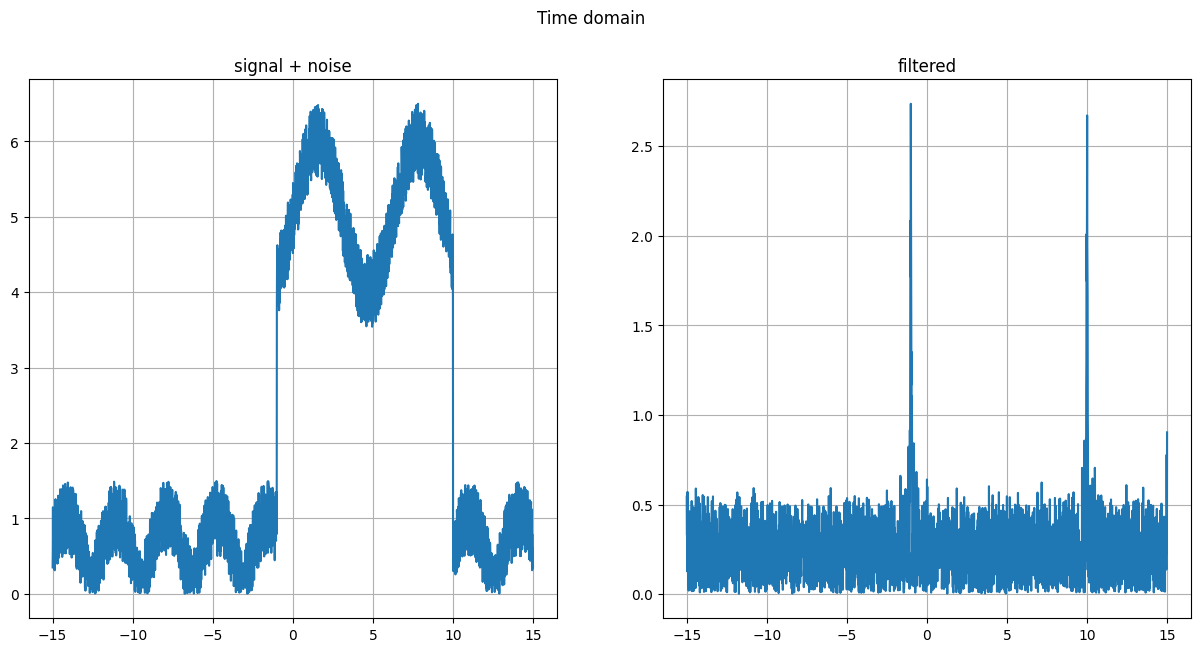

In [50]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.suptitle('Time domain')
plt.sca(axs[0])
plt.title('signal + noise')
plt.plot(t, np.abs(u(t, b, c, d)))
plt.grid(True)
plt.sca(axs[1])
plt.title('filtered')
plt.plot(t, np.abs(u_filtered))
plt.grid(True)

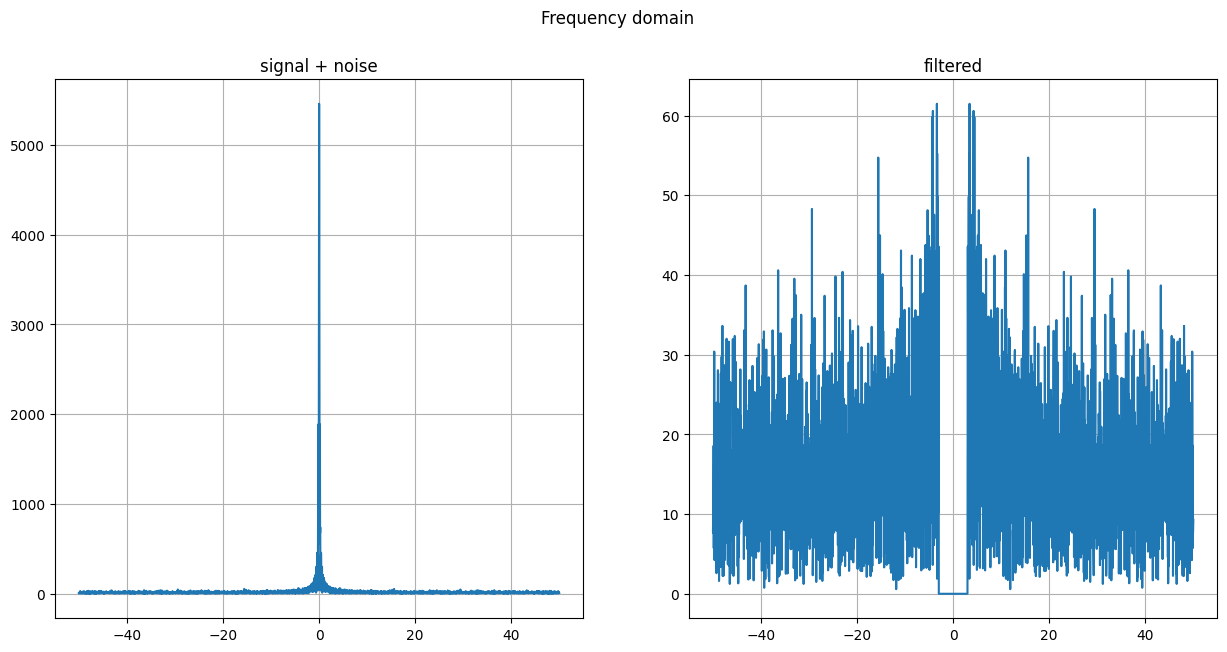

In [51]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.suptitle('Frequency domain')
plt.sca(axs[0])
plt.title('signal + noise')
plt.plot(freq, np.abs(u_hat))
plt.grid(True)
plt.sca(axs[1])
plt.title('filtered')
plt.plot(freq, np.abs(u_hat_filtered))
plt.grid(True)

# Задание 2. Фильтрация звука

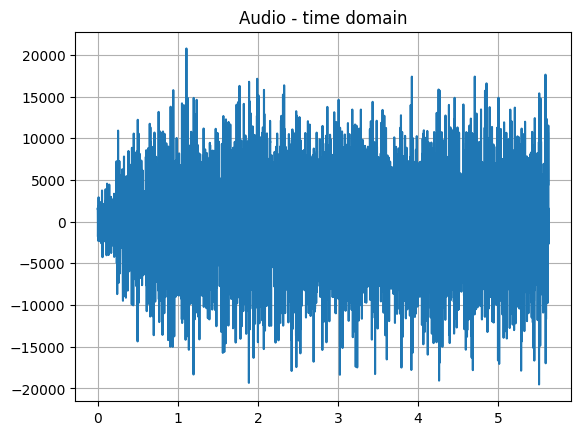

In [63]:
a = pydub.AudioSegment.from_wav('MUHA.wav')
y = np.array(a.get_array_of_samples())
dt = 1 / a.frame_rate
T = len(y) * dt
t = np.linspace(0, T, len(y))
plt.title('Audio - time domain')
plt.plot(t, y)
plt.grid(True)

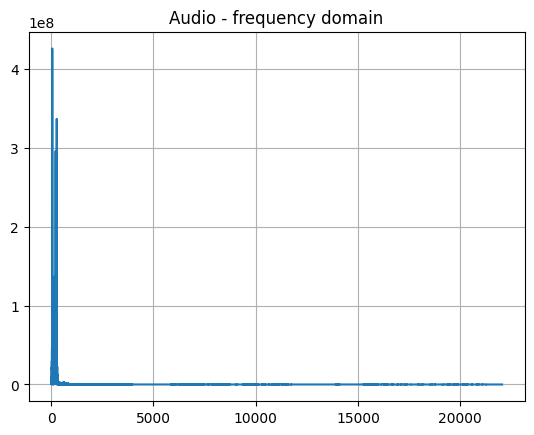

In [65]:
V = 1 / dt
dv = 1 / T
y_hat = sp.fft.fftshift(sp.fft.fft(y))
freq = np.linspace(-V / 2, V / 2, int(V / dv))
plt.title('Audio - frequency domain')
plt.plot(freq[len(freq) // 2:], np.abs(y_hat[len(y_hat) // 2:]))
plt.grid(True)

In [90]:
v1 = 500
v2 = 5000
y_hat_filtered = y_hat.copy()
for i, v in enumerate(freq):
    if np.abs(v) < v0 or np.abs(v) > v2:
        y_hat_filtered[i] = 0
y_filtered = sp.fft.ifft(sp.fft.ifftshift(y_hat_filtered))

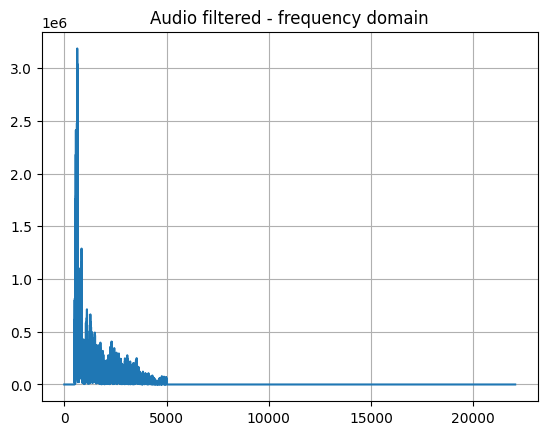

In [91]:
plt.title('Audio filtered - frequency domain')
plt.plot(freq[len(freq) // 2:], np.abs(y_hat_filtered[len(y_hat_filtered) // 2:]))
plt.grid(True)

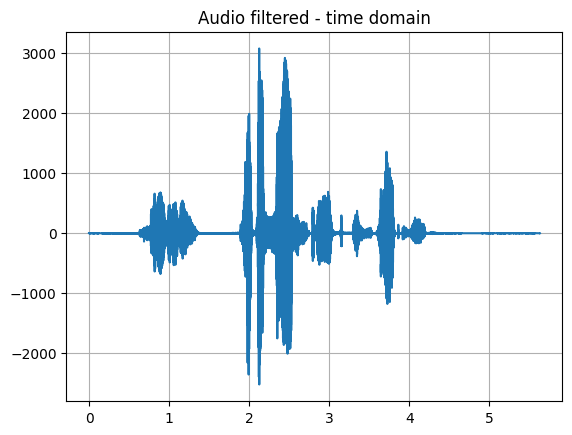

In [92]:
plt.title('Audio filtered - time domain')
plt.plot(t, y_filtered)
plt.grid(True)

In [93]:
sp.io.wavfile.write('MUHA_filtered.wav', a.frame_rate, y_filtered.astype('int16'))